# Upx Academy - Data Science Foundations

## Final Project - Airlines

## Team Info

- Shivakumar Konar (United Kingdom).

An industry certified Business Intelligence professional and Big Data Developer with over 5 years of experience in designing, building and maintaining large scale data warehouses, near real-time analytics and reporting solutions. Experienced in liaising with internal and external stakeholders to capture business requirements and building systems that help effectively analyze and process big and complex data. Currently undergoing Data Science training with UpX Academy to make a break into exciting world of Machine Learning and Data Science

- Carl Bylin (Colombia)

A Swedish entrepreneur with a Bachelors degree en Business Management, currently living in Colombia. I worked in process optimization for Latam Airlines in El Dorado International Airport (Bogota), before founding Panda Lab, a coworking space with a technological focus. After graduating from Udacity's Deep Learning Foundations and Machine Learning Nanodegrees I am currently enrolled in Upx Academy's 6-month Data Science certification in order to better support startups and companies in Colombia's quickly evolving business landscape.    

- Akhil V (United States)

I am an aspiring Data Scientist who loves to bring success to the organizations with data driven decisions. Currently a Technology professional with experience in Analysis, Design, Development and Reporting working for Financial Client. I hold a Masters Degree in International Business Management and a Bachelors Degree in Engineering. Currently pursuing Data Science Program with UpX Academy to excel in implementing various algorithms that play vital role in driving business.

## Domain & Topic of Project

**Domain:** Airlines
**Topic:** Analyze NYC-Flight data

The dataset contains information about all flights that departed from airports in NYC like JFK, LGA and EWR in 2013. It is a total of 336.776 flights.


## Introduction

The **U.S. Department of Transportation’s Bureau of Transportation Statistics (BTS)** reported in March of 2017 that U.S. airlines carried an **all-time high** number of passengers in 2016 – 823.0 million systemwide, 719.0 million domestic and 103.9 million international – surpassing the previous highs reached in 2015. 

The Federal Aviation Administration has to ensure that the airports are in capacity of operating with the growing number of air traffic. For this reason they are planning to invest in the infrastructure of the airports. Still, resources are limited and for that reason **a team of data scientists has been hired by the FAA to decide which airports to invest in and why to maximize the impact of the investment**.

Source: https://www.rita.dot.gov/bts/press_releases/bts013_17

## Data Description

The dataset has a total of 336.776 rows (flights) and 19 columns (features) which are described here:

| Feature | Description |
|---------|-------------|
| year | 2013 |
| month | 1-12 |
| day | Day of the month (1-31) |
| dep_time | Departure times, local timezone |
| sched_dep_time | Scheduled departure time |
| dep_delay | Departure delay, in minutes. Negative times represent early departures |
| arr_time | Arrival times, local timezone |
| sched_arr_time | Scheduled arrival time |
| arr_delay | Arrival delay, in minutes. Negative times represent early arrivals |
| carrier | Two-letter carrier abbreviation |
| flight | Flight number |
| tailnum | Plane tail number |
| origin, dest | Airport codes for origin and destination |
| air_time | Amount of time spent in the air, in minutes |
| distance | Distance flown, in miles |
| hour, minute | Time of departure broken into hour and minutes |
| time_hour | Tiemstamp |

In [2]:
# Import the necessary libraries
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('flight_data.csv')
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [4]:
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataset has 336776 rows and 19 columns


In [5]:
# To check the column datatypes of the dataset
print(df.dtypes)

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object


## Clean data
Before any type of analysis we need to clean our data in order to avoid any misinterpretations due to errors in our dataset. For that we'll start by cheking the data to find if there are any missing values. We can do this by importing "missingno", a missing data visualization module for Python. Based on the outcome we deal with the missing data by either removing or filling it.

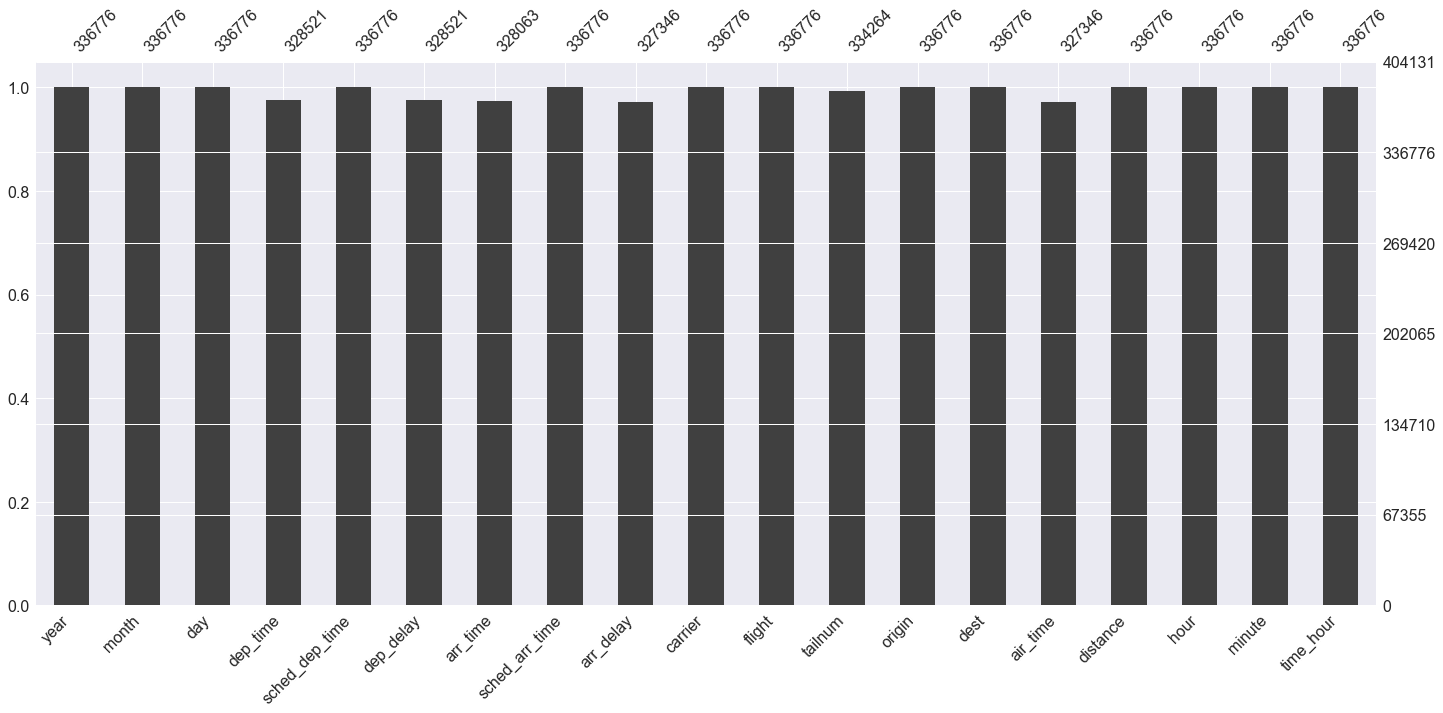

In [6]:
import missingno as msno
msno.bar(df)

From above graph we notice that some data is missing for certain flights. We have missing data for Departure time, Arrival time, Departure Delay, Arrival Delay and Air time. Before making any changes to Original Dataset, make a copy and give it the name of df1 so that we can still use the original dataset later if needed.

In [7]:
df1 = df.copy()

In [8]:
df1.dropna(inplace=True)

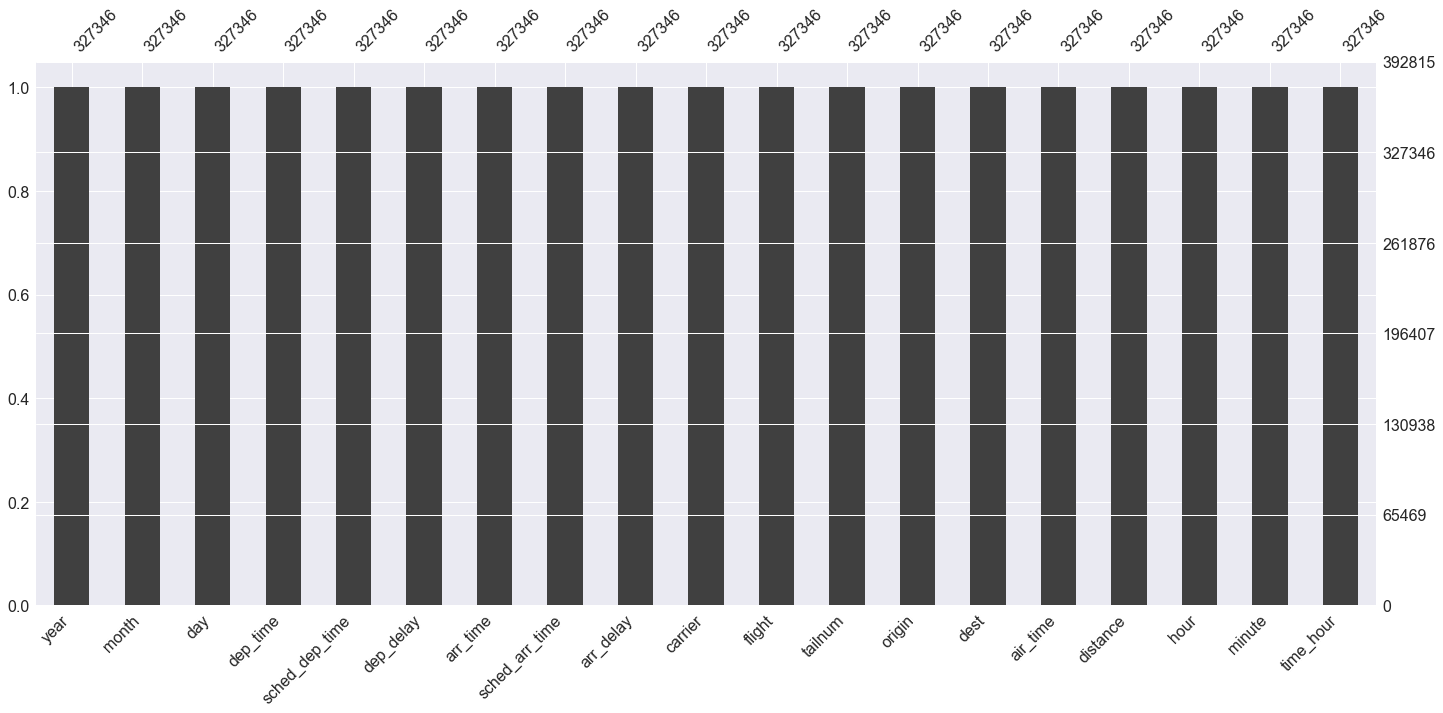

In [9]:
msno.bar(df1)

In [10]:
print('Percentage of missing data: {}%'.format(round(((df.shape[0] - df1.shape[0])/df.shape[0])*100,4)))

Percentage of missing data: 2.8001%


Given that only around 2.8% of the rows contain missing values we decide to remove them.

## Business Questions

### Question 1: Is the data relevant for the problem?

**Approach:** 

We will first take a look at the data and evaluate if the features are relevant and enough to tackle the main objective of this project. This means looking closer at the data to decide if it can help us answer the proposed problem and if any further preprocessing is needed in order to analyze the data.

Looking back at the objective, the Federal Aviation Administration has to ensure that the airports are in capacity of operating with the growing number of air traffic and thus wants to decide which airports to invest in and why to maximize the impact of their resources. Delays in flights are a natural consequence of operational problems in airports. For this reason, it is useful to take a closer look at the relevant variables:

In [11]:
df1[['dep_delay', 'arr_delay', 'air_time', 'distance']].describe()

,dep_delay,arr_delay,air_time,distance
count,327346.000000,327346.000000,327346.000000,327346.000000
mean,12.555156,6.895377,150.686460,1048.371314
std,40.065688,44.633292,93.688305,735.908523
min,-43.000000,-86.000000,20.000000,80.000000
25%,-5.000000,-17.000000,82.000000,509.000000
50%,-2.000000,-5.000000,129.000000,888.000000
75%,11.000000,14.000000,192.000000,1389.000000
max,1301.000000,1272.000000,695.000000,4983.000000


The chosen variables above were 'dep_delay', 'arr_delay', 'air_time' and 'distance'. The first three are measured in minutes and the distance flown is measured in miles.

The mean departure delay is almost 13 minutes and the mean arrival delay is almost 7 minutes. The first thing that grabs our attention is the maximum delay times: 1301 minutes (almost 22 hours) for departures and 1272 minutes (just above 21 hours) for arrivals. This indicates that the dataset probably has a few outliers that might affect the results of our analysis.

To understand this better we can use boxplots of the the delay times, separating them by months:

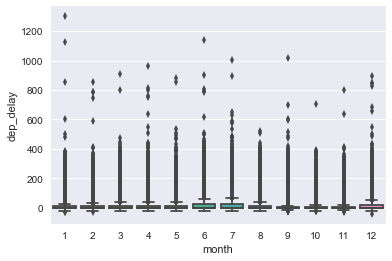

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.boxplot(x='month', y='dep_delay', data=df1)

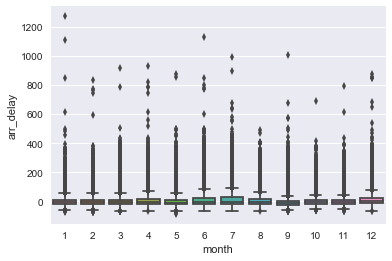

In [13]:
sns.boxplot(x='month', y='arr_delay', data=df1)

Outliers are observations that are distant from all the other observations and can often cause problems during statistical analysis. As seen above, the departure delay median is at -2 minutes (2 minutes early) while the mean is almost 13 minutes after the scheduled depature time. This difference is caused by very large outliers. These can be due to errors during measurement or exceptional events. We want to see underlying trends and not waste resources solving a problem that might happen once every 10 years. 

For the reasons above, we will eliminate the outliers using the Interquartile Range eliminating the values that are under or above 1.5 * IQR:

In [14]:
dep_IQR = df1['dep_delay'].quantile(0.75) - df1['dep_delay'].quantile(0.25)
arr_IQR = df1['arr_delay'].quantile(0.75) - df1['arr_delay'].quantile(0.25)

print('Departure Interquartile Range:', dep_IQR)
print('Arrival Interquartile Range:', arr_IQR)

Departure Interquartile Range: 16.0
Arrival Interquartile Range: 31.0


In [15]:
dep_mean = df1['dep_delay'].mean()
dep_min = dep_mean - 1.5 * dep_mean
dep_max = dep_mean + 1.5 * dep_mean
arr_mean = df1['arr_delay'].mean()
arr_min = arr_mean - 1.5 * arr_mean
arr_max = arr_mean + 1.5 * arr_mean

df2 = df1[((df1['dep_delay'] > dep_min) & (df1['dep_delay'] < dep_max)) & 
          ((df1['arr_delay'] > arr_min) & (df1['arr_delay'] < arr_max))].copy()

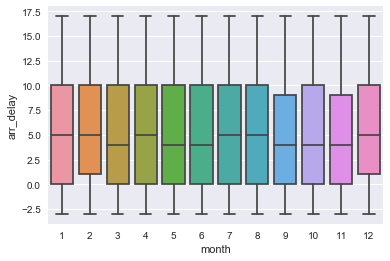

In [16]:
sns.boxplot(x='month', y='arr_delay', data=df2)

In [17]:
strong_delay_flights = df1[(df1['dep_delay'] > dep_max) | (df1['arr_delay'] > arr_max)].copy()

**Findings:** 

We found that the dataset had outliers that had a strong effect on visualizations and statistical analysis. The outliers were eliminated. But we also kept a copy of the dataset with just the outliers to evaluate if there is any trend causing the heavy delays. 

In terms of the sufficiency of the data, there are aspects than are relevant to the problem that might not be completely answered by the available data given the amount of factors involved. For that reason, some additional data will be added in the coming questions if needed.

### Question 2: Is there any relationship between origin airport and departure delays?

**Approach:** 

It is also important to emphasize that the dataset contains flights in the US departing from New York. This helps us to narrow the scope of what we can actually can do with the data (i.e. we can't make conclusions about departure delays in Atlanta).

First of all, we have to evaluate what differences we can find between the departure airports that could have an effect on the delays. After this we use statistical functions to describe the data related to each airport and visualize the results with relevant graphs.

In [18]:
origin_airports = sorted(df1.origin.unique())
destination_airports = sorted(df1.dest.unique())

In [19]:
origin_airports

['EWR', 'JFK', 'LGA']

The dataset only contains flights leaving from EWR (Newark Liberty International Airport), JFK ( John F. Kennedy International Airport) and LGA (La Guardia Airport).

This dataset has information regarding the distance between the origin and destination of the flight. But it can potentially also be good to know where the airports are located physically. At https://old.datahub.io/dataset/global-airports there is a dataset available which describes several features for airports around the world like city, country, FAA code, latitude, longitude, altitude (in feet), etc.

From this data we will load longitude, latitude and altitude for airports in the US so we can use it with our current dataset.

In [20]:
airports = pd.read_csv('global_airports.csv', index_col='iata_faa')
airports = airports[airports['country'] == 'United States']
airports = airports[['longitude', 'latitude', 'altitude']]

In [21]:
airports.index.name = 'FAA'
airports.head()

,longitude,latitude,altitude
FAA,,,
4I7,-86.813806,39.633556,842
C91,-86.128012,41.992934,748
CDI,-81.577583,39.975028,799
SUE,-87.421556,44.843667,725
0P2,-76.647191,39.794824,1000


In [22]:
airports.loc['JFK']

longitude   -73.778925
latitude     40.639751
altitude     13.000000
Name: JFK, dtype: float64

In [23]:
len(destination_airports)

104

There are 104 destination airports in the clean dataset. A way to group the data and is by mapping the airports to the states they are in with the data found in the following link: https://en.wikipedia.org/wiki/List_of_airports_in_the_United_States

In [24]:
us_airports = pd.read_csv('us_airports.csv', index_col='FAA')
us_airports.head()

,State,City,IATA,ICAO,Airport
FAA,,,,,
BHM,ALABAMA,Birmingham,BHM,KBHM,Birmingham–Shuttlesworth International Airport
DHN,ALABAMA,Dothan,DHN,KDHN,Dothan Regional Airport
HSV,ALABAMA,Huntsville,HSV,KHSV,Huntsville International Airport
MOB,ALABAMA,Mobile,MOB,KMOB,Mobile Regional Airport
MGM,ALABAMA,Montgomery,MGM,KMGM,Montgomery Regional Airport (Dannelly Field)


In [25]:
df2['origin_state'] = df2['origin'].replace(us_airports['State'])
df2['dest_state'] = df2['dest'].replace(us_airports['State'])

In [26]:
del us_airports

At this point we can plot out the flight paths from each departure airport:

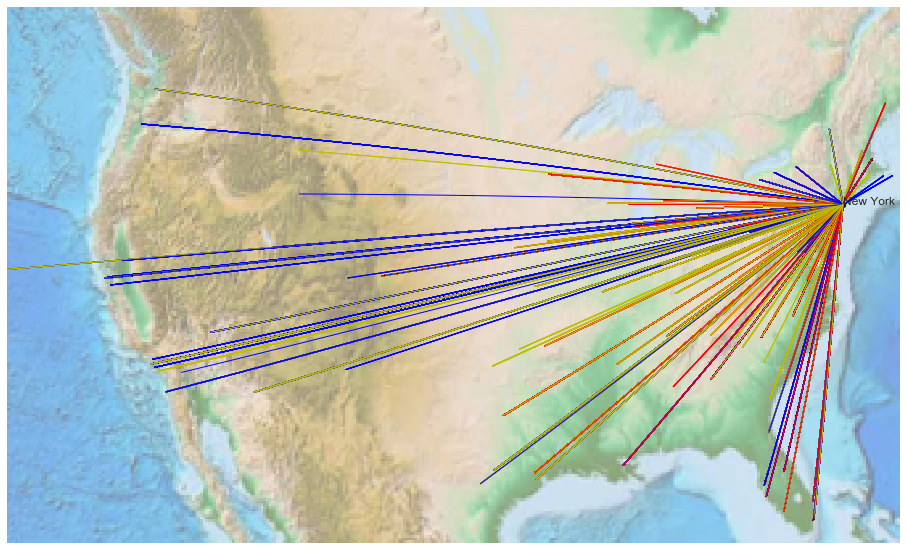

In [27]:
import matplotlib.image as mpimg
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(16, 16))
m = Basemap(projection='lcc', resolution=None,
            width=5E6, height=3E6, 
            lat_0=40, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

orig_lon, orig_lat = airports.loc['JFK'][0], airports.loc['JFK'][1]

x, y = m(orig_lon, orig_lat)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'New York', fontsize=12);

color_code = {'EWR': 'y', 'JFK': 'b', 'LGA': 'r'}
for index, row in df2.sample(n=10000).iterrows():
    try:
        dest_lon, dest_lat, _ = airports.loc[row['dest']]
        m.drawgreatcircle(orig_lon, orig_lat, dest_lon, dest_lat, linewidth=1, color=color_code[row['origin']]);
    except:
        continue        
    
plt.show()

In the map above, flights leaving from LGA are red, departing from JFK are blue and the yellow flights are from EWR. Visually it seems like flights from LGA are shorter while JFK seems to be the departure base for the longer flights.

We can test this by calculating the mean distance from each airport and plotting the results:

In [28]:
df2.groupby(by=['origin'])['distance'].mean()

origin
EWR    1058.026753
JFK    1258.281927
LGA     793.031481
Name: distance, dtype: float64

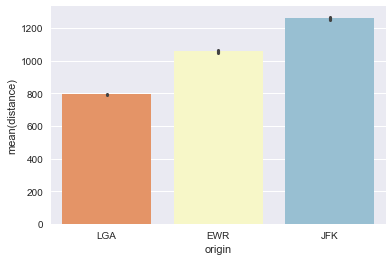

In [29]:
sns.barplot(x='origin', y='distance', data=df2, order=['LGA', 'EWR', 'JFK'], estimator=np.mean, palette='RdYlBu')

The data shows that the flights going out from LGA are on average the shortest while the flights from JFK are on average the longest. Taking this into account we can also check if there is a significant difference in departure delays from each airport:

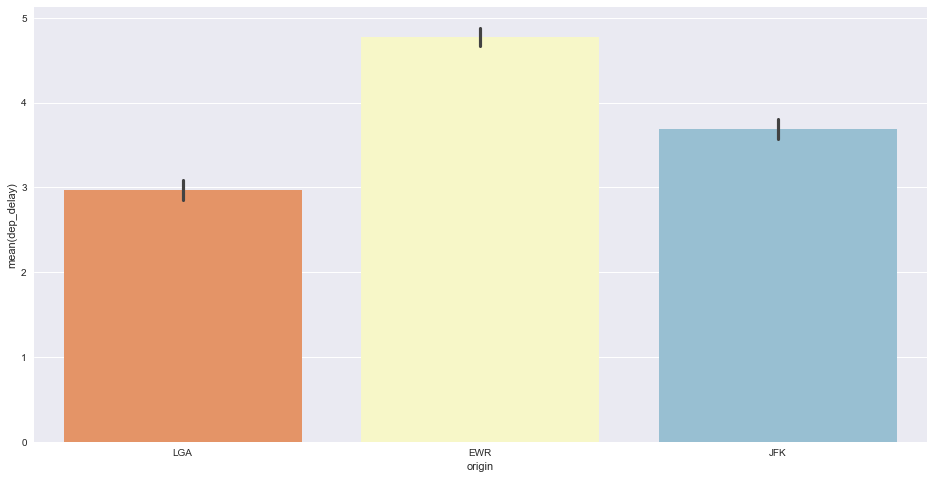

In [30]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x='origin', y='dep_delay', data=df2, order=['LGA', 'EWR', 'JFK'], palette='RdYlBu', estimator=np.mean, ax=ax)

This graph that LGA has in average the shortest departure delays. Intuitively his makes sense because longer flights are more complex and require more preparation and safety checks before take-off. Still, the scale of the plot can be a bit misleading. The difference is not so big: 

In [31]:
delay_EWR_mean = df2[df2['origin']=='EWR'].dep_delay.mean()
delay_LGA_mean = df2[df2['origin']=='LGA'].dep_delay.mean()

print(round(delay_EWR_mean - delay_LGA_mean,2), 'minutes')

1.81 minutes


It is also important to look at the distribution of the data to evaluate if the mean is the most adequate satistic for analysis with this feature:

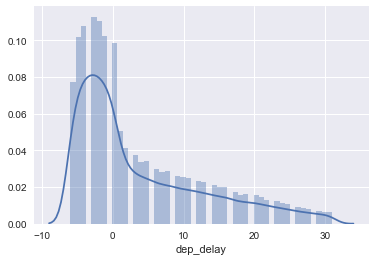

In [32]:
sns.distplot(df2['dep_delay'])

As we can se in the graph above, the distribution is strongly skewed to the right even though we already took care of the outliers. For this reason it might be more informative to use the median:

In [33]:
df2.groupby('origin')['dep_delay'].median()

origin
EWR    1.0
JFK    0.0
LGA   -1.0
Name: dep_delay, dtype: float64

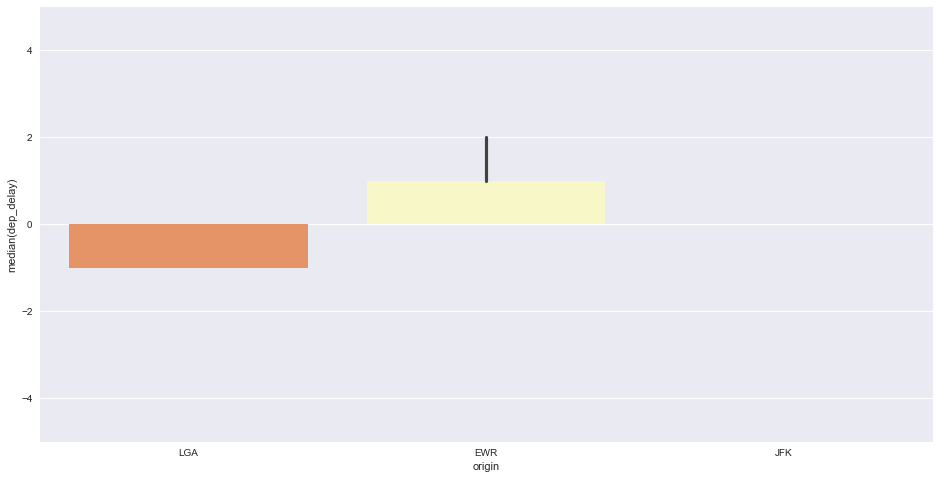

In [34]:
fig, ax = plt.subplots(figsize=(16,8))
plt.ylim(-5, 5)
sns.barplot(x='origin', y='dep_delay', data=df2, order=['LGA', 'EWR', 'JFK'], palette='RdYlBu', estimator=np.median, ax=ax)

Here we see that with the median there is still no significant difference between origin airports in terms of delays. The severity of the delays are also toned down. 

**Findings:** 

First of all, even though we already took care of outliers, some features are still strongly skewed. For that reason, we will mostly be using the median instead of the mean as our principal centreal tendency measure for this type of features.

Taking this into account we can see that there doesn't seem to be a big difference in departure delays related to the airport of origin.  

### Question 3: Is there any relationship between destination airport and arrival delays?

**Approach:** 

Given what we saw in the previous question, the arrival delay data is probably also skewed. First of all we have to check this and if it is so we will keep analyzing the data with the median. As seen earlier, there are over a hundred destination airports. For this reason we will group the data by states and from there narrow down to evaluate if there is a significant relationship between destination airports and arrival delays. 

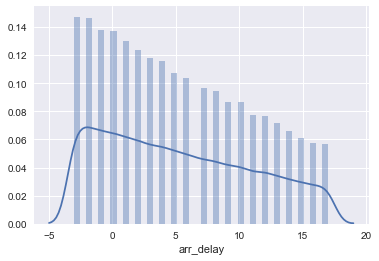

In [35]:
sns.distplot(df2['arr_delay'])

In [36]:
df2.groupby('dest_state')['arr_delay'].median()

dest_state
ALABAMA                 2.0
ALASKA                  6.0
ARIZONA                 5.0
ARKANSAS                7.0
CALIFORNIA              4.0
COLORADO                5.0
CONNECTICUT             3.0
FLORIDA                 5.0
GEORGIA                 5.0
HAWAII                  3.0
ILLINOIS                4.0
INDIANA                 3.0
IOWA                    4.0
KENTUCKY                4.0
LOUISIANA               5.0
MAINE                   5.0
MARYLAND                4.0
MASSACHUSETTS           3.0
MICHIGAN                4.0
MINNESOTA               5.0
MISSOURI                4.0
MONTANA                 2.0
NEBRASKA                5.0
NEVADA                  5.0
NEW HAMPSHIRE           4.0
NEW MEXICO              5.0
NEW YORK                4.0
NORTH CAROLINA          4.0
OHIO                    5.0
OKLAHOMA                6.0
OREGON                  4.0
PENNSYLVANIA            4.0
PUERTO RICO             4.0
RHODE ISLAND            4.0
SOUTH CAROLINA          4.0
TENNESSEE

We can visually plot the info above:

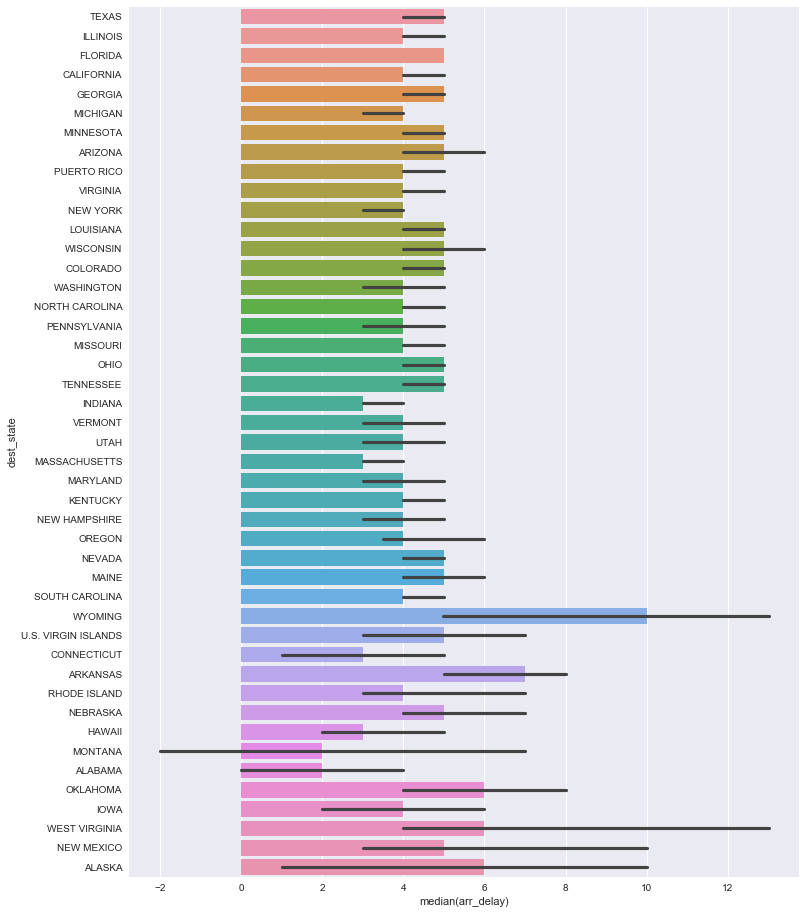

In [37]:
fig, ax = plt.subplots(figsize=(12,16))
sns.barplot(x='arr_delay', y='dest_state', data=df2, estimator=np.median, ax=ax)

We can also visualize this information with a map of the US, segmented by states:

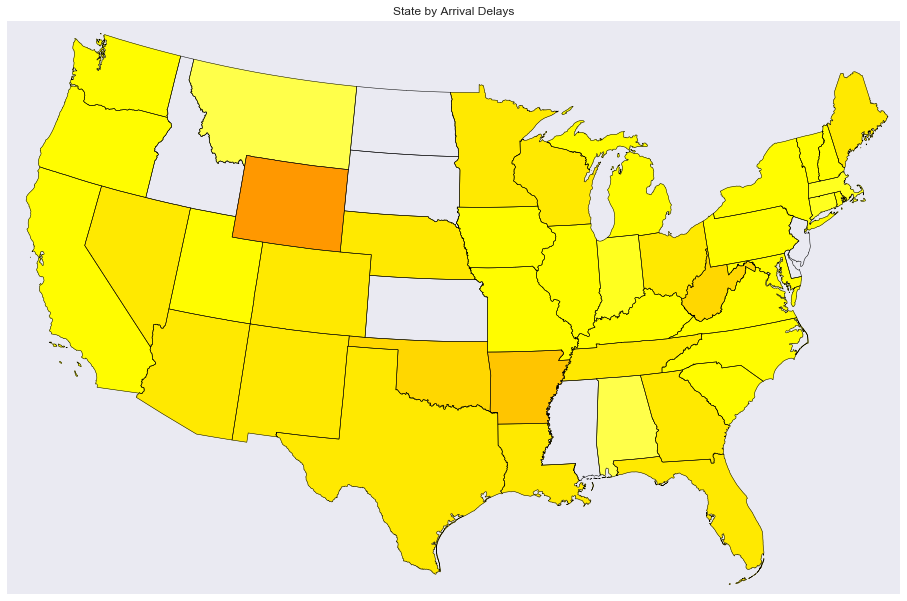

In [38]:
# Based on https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

# Lambert Conformal map of lower 48 states.
fig = plt.figure(figsize=(16, 16))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)

medians = [m for m in df2.groupby('dest_state')['arr_delay'].median()]
state_medians = dict(zip(df2.groupby('dest_state')['arr_delay'].median().index, medians))

# choose a color for each state based on delay.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 60 # set range

# States with no destination airport in this dataset
ignore = ['DELAWARE', 'DISTRICT OF COLUMBIA', 'IDAHO', 'MISSISSIPPI', 'NORTH DAKOTA', 'SOUTH DAKOTA', 'NEW JERSEY' , 'KANSAS']
for shapedict in m.states_info:
    statename = shapedict['NAME'].upper()
    if statename not in ignore:
        pop = state_medians[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    if statenames[nshape] not in ignore:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

plt.title('State by Arrival Delays')
plt.show()

The data and graphs above seem to show that arrivals to Jackson Hole Airport in Wyoming tend to be higher than the rest. Still, before making any conclusions about the airport it is important to understand these flights better. 

In [39]:
print('Number of flights to Jackson Hole Airport from NYC in 2013:', df[df['dest']=='JAC'].shape[0])

Number of flights to Jackson Hole Airport from NYC in 2013: 25


Using the whole original dataset we see that we only have 25 flights to JAC in Wyoming. This is not enough to conclude that the airport is directly correlated to arrival delays. We can dig even further by looking at months in which these flights took place:

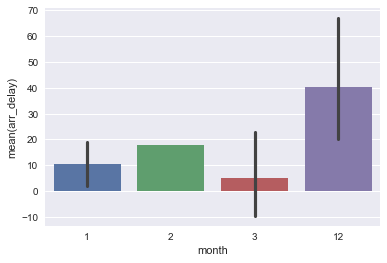

In [40]:
sns.barplot(x='month', y='arr_delay', data=df[df['dest']=='JAC'])

The data only shows flights to JAC during winter. This explains why the median of arrival flight delays is much higher than the other states. Wyoming is geographically in the north of the United States with snowy winters. Bad weather is probably the principal cause of these delays.

Flights from the rest of the year could possibly even out the median, bringing it closer to the rest of the airports. 

**Findings:** 

As with the airport of origin, there doesn't seem to be a big difference in arrival delays with respect to the destination airport. The only exception was JAC (Jackson Hole Airport) in Wyoming. Still, by taking a closer look at the data we discovered that the number of flight arriving in JAC throughout the year was very low (25 flights), which makes it difficult to make a significant inference about the data. 

Additionally, the available data is mostly from the winter months. Given that Wyoming is located in the north of the US it is probable that the high delays were caused by bad weather during winter. We would need to compare this data to flights arriving in Wyoming the rest of the year in order to decide if JAC still has higher arrival delays than the rest of the airports. 

For now, we conclude that the arrival airport is not the main cause of arrival delays.

### Question 4: Which month and what time of the day is most critical in flight delays?

The previous points didn't show any significant relationship between delays and the origin or destination airports. The only interesting case with high delays in Wyoming seem to be explained by bad weather. Because of this it can be useful to analyze the data with respect to information that are not controlled directly by the airport. This dataset doesn't contain information about weather, but for now we can analyze delays with respect to time.

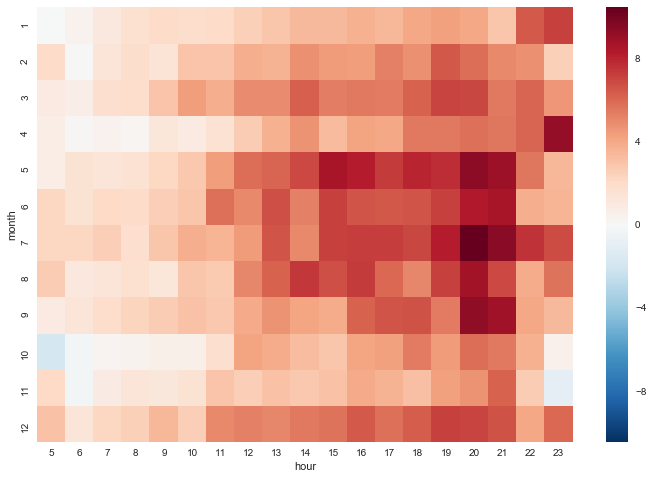

In [41]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df2.pivot_table('dep_delay', 'month', 'hour'), ax=ax)

This heatmap plots departure delays with respect to months of the year and hour of the day. A darker color indicates a higher delay. Here we can clearly see that time is a significant factor when it comes to delays. Most departure delays seem to be centered in the summer months with a small rise again in december. 

On a day-to-day basis, early mornings seem to flow easily while afternoons and evenings start to show more delays peaking at around 20:00-21:00.  

In [42]:
dep_delayed = df2[df2['dep_delay'] > 0]
arr_delayed = df2[df2['arr_delay'] > 0]

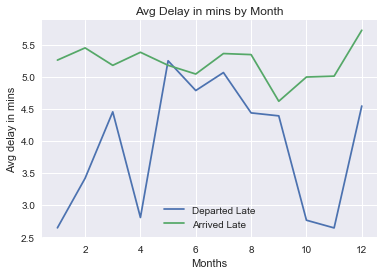

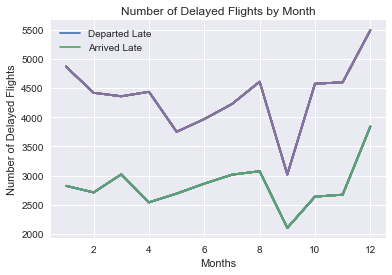

In [43]:
label=['Departed Late', 'Arrived Late']

plt.plot(df2.groupby('month')['dep_delay'].mean(),label='Departed Late')
plt.plot(df2.groupby('month')['arr_delay'].mean(),label='Arrived Late')
plt.xlabel('Months')
plt.ylabel('Avg delay in mins')
plt.title('Avg Delay in mins by Month')
plt.legend(label)
plt.show()

plt.plot(dep_delayed.groupby('month').count(),label='Departed Late')
plt.plot(arr_delayed.groupby('month').count(),label='Arrived Late')
plt.xlabel('Months')
plt.ylabel('Number of Delayed Flights')
plt.title('Number of Delayed Flights by Month')
plt.legend(label)
plt.show()

These graphs help us to better see the pattern in average delays for all flights/ airlines. Intuitively, it looks like late departures are closely related to late arrivals when looking at the count plot. It is worth mentioning that arrival delays tend to always be lower than departure delays (which can be seen in the first plot). This could be explained by delayed flights compensating during the flight. Commercial airplanes don't usually fly at maximum speed, which gives them the ability to compensate late flights if needed.

Another explanation for the relationship between both types of delays is that flights that arrive late might also lead to late departures. In this dataset it is not easy to prove because we only have flights departing from New York and can't follow the flights in their path. But the effect could still be seen because flights that are late in a particular gate would probably cause the next flights to be late. Also, flights that go back and forth would be coming back late if they leave late in the first place.

We can also see some difference in flights that arrived late are more during holidays. During Summer and Christmas periods there is a important increase in delays.

Finally, we also notice a small departure delay peak in April. Easter is the holiday that is usually in April but it is usually not associated with as much travel as summer vacations and Christmas. If it were so we would also expect to see peaks in other small holidays. A quick Google search shows interestingly that April 2013 is strongly associated with a few terrorist acts like the April 2013 ricin letters and, especially, the Boston marathon bombing. This would probably mean that security in airport was tightened causing a small surge in delayed flights.

In [44]:
ewr_departures_df = df2[df2['origin'] == 'EWR']
ewr_departures_df.head()
ewr_departures_group = ewr_departures_df.groupby('hour')

jfk_departures_df = df2[df2['origin'] == 'JFK']
jfk_departures_df.head()
jfk_departures_group = jfk_departures_df.groupby('hour')

lga_departures_df = df2[df2['origin'] == 'LGA']
lga_departures_df.head()
lga_departures_group = lga_departures_df.groupby('hour')

In [45]:
ewr_hours_df = ewr_departures_group.agg({'dep_delay':'mean',
                   'arr_delay':'mean'})

jfk_hours_df = jfk_departures_group.agg({'dep_delay':'mean',
                   'arr_delay':'mean'})

lga_hours_df = lga_departures_group.agg({'dep_delay':'mean',
                   'arr_delay':'mean'})

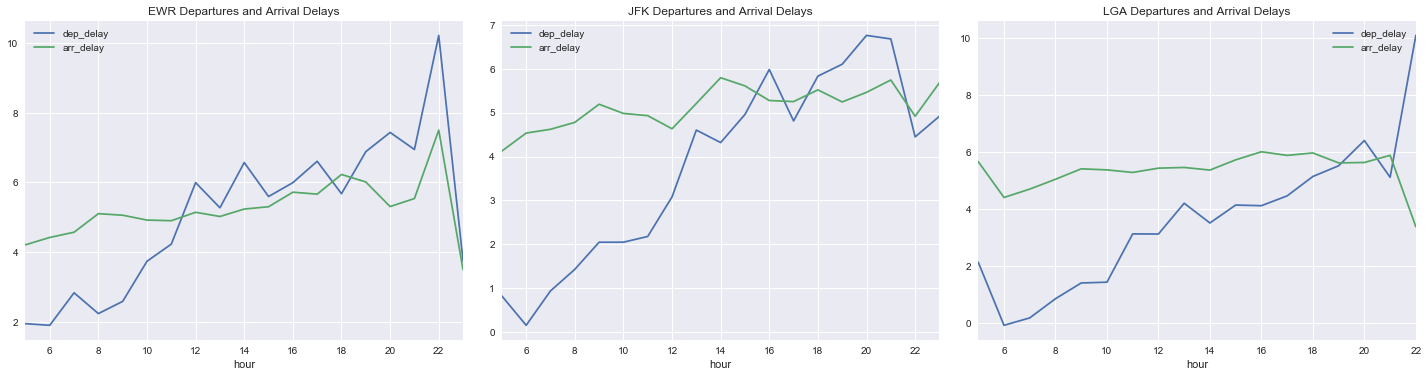

In [46]:
fig, ax= plt.subplots(1,3, figsize=(20,5))
fig.tight_layout()
ewr_hours_df.plot(ax=ax[0], title='EWR Departures and Arrival Delays')
jfk_hours_df.plot(ax=ax[1], title='JFK Departures and Arrival Delays')
lga_hours_df.plot(ax=ax[2], title='LGA Departures and Arrival Delays')

Plotting delays with respect to the hour of the day, we can also see that most delays in departures happen between 1800 hrs and 2200 hrs at all three airports.

**Findings:**

The graphs above show us that time is a very relevant factor when trying to understand flight delays. Most of the delays happen during holiday months like summer or for christmas, and evenings ranging from 18:00 to 22:00 seem to be the toughest hours each day.  

This is most probably due to peaks in travel. During summer and winter it's normal for most people to travel because of vacations and holidays. Airlines and airports are known to use this information to schedule staff in order to minimize the impact. Still, it might be a good idea to take a closer look and invest in more staff to be present during those peak hours or in some way manage a better distribution of the flights.

### Question 5: Is the carrier correlated to delays?

Every flight has three crucial actors involved. The travelers, the airports and the carriers or airlines. We already had a look at the airports and time has given us a glimpse into the habits of the travelers. It is now time to study the airlines and their relationship with delays.

In [47]:
carrier_group = df2.groupby(by='carrier')

In [48]:
carrier_df = carrier_group.agg({'dep_delay':'mean',
                   'arr_delay':'mean',
                   'air_time':'mean',
                   'distance':'mean'})

In [49]:
carrier_df

,dep_delay,arr_delay,air_time,distance
carrier,,,,
9E,5.306503,5.102285,90.881195,537.526186
AA,2.745629,5.151868,198.960233,1381.118786
AS,4.877778,6.788889,338.755556,2402.000000
B6,3.897647,5.289933,153.642846,1065.040173
DL,2.805986,5.086575,174.279321,1204.167788
EV,4.726604,5.309915,91.448273,555.809780
F9,4.167598,6.178771,230.687151,1620.000000
FL,3.776149,5.983382,104.025415,681.679374
HA,-0.089286,6.107143,628.357143,4983.000000


Above we see the average departure delays, arrival delays, air time and distance for the 16 carriers present in the dataset. At a first glance we can see a wide range with, for example, average departure delays of almost 20 minutes for some carriers and around 5 minutes for others.

In [50]:
carrier_df.sort_values(by='dep_delay', inplace=True)

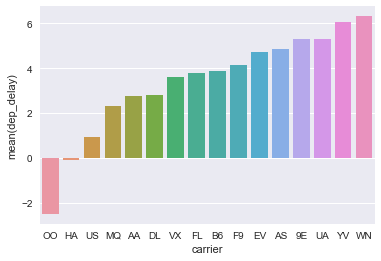

In [51]:
sns.barplot(x=carrier_df.index, y='dep_delay', data=carrier_df)

In [52]:
carrier_df.sort_values(by='arr_delay', inplace=True)

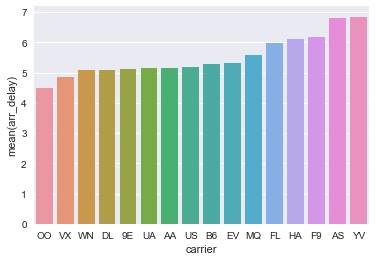

In [53]:
sns.barplot(x=carrier_df.index, y='arr_delay', data=carrier_df)

The two graphs above are sorted from lowest average delays to highest by airlines for both departure and arrival. There seems to be a significant difference, but before making any conclusions we should take a closer look at the type of flights these carriers are associated with. 

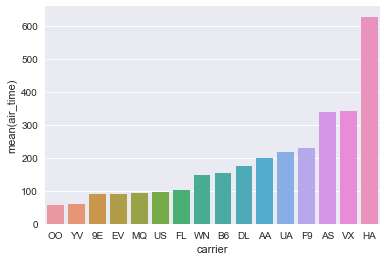

In [54]:
carrier_df.sort_values(by='air_time', inplace=True)
sns.barplot(x=carrier_df.index, y='air_time', data=carrier_df)

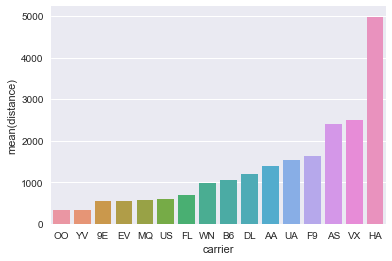

In [55]:
carrier_df.sort_values(by='distance', inplace=True)
sns.barplot(x=carrier_df.index, y='distance', data=carrier_df)

From the above charts it can be seen that Mesa Airlines (YV) has the most overall arrival and departure delay. The arrival and departure delays are significant inspite of being one of the shortest distance carriers.

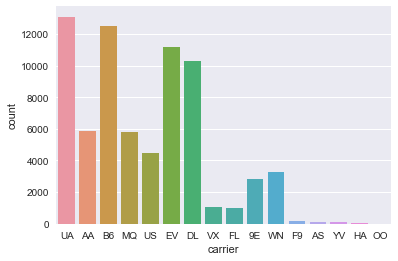

In [56]:
sns.countplot(x='carrier', data=df2)

In [57]:
print('Number of Mesa Airlines Flights:', df2[df2['carrier']=='YV'].shape[0])
print('Number of United Airlines Flights:', df2[df2['carrier']=='UA'].shape[0])

Number of Mesa Airlines Flights: 90
Number of United Airlines Flights: 13085


It is important to notice that most of the airlines with the highest average of delays actually have very few flights compared to the industry leaders. The only difference is United Airlines which has the highest departure delay average and is the airline with most flights in this dataset. 

This has to make us think that the great amount of flight might also indicate a much larger range. Next we can see boxplots of the departure delays by month for United Airlines.

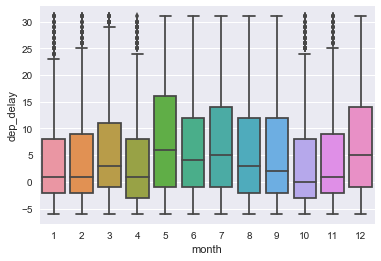

In [58]:
sns.boxplot(x='month', y='dep_delay', data=df2[df2['carrier']=='UA'])

We already eliminated the outliers from the dataset, but just by looking at the current boxplots for United Airlines it seems like the median each month is relatively low with a number of high outliers. Being the airline with the most flights it is intuitively possible that it also has the widest distribution of delays with a few vey high delays causing the average to be skewed.

We can take a look at the median for each carrier all year in terms of departure delays.

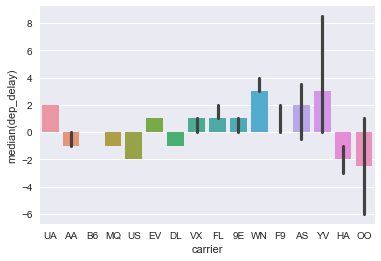

In [59]:
sns.barplot(x='carrier', y='dep_delay', data=df2, estimator=np.median)

This is informative because United Airlines is not the airline with the highest departure delay median, but it is in the top three.

**Findings:**

The statistics and graphs above do seem to indicate that carriers are another important feature to have in mind when studying delays. It is interesting to note that Hawaiian Airlines, Virgin America and American Airlines have a relatively low average of delays despite traveling on average the farthest. This compared to Frontier Airlines which is fourth in terms of distance but has the highest average for both arrival and departure delays. 

The top three airlines in terms of departure delays (by median) are Southwest Airlines (WN), Mesa Airlines (YV), United Airlines (UA). Instead of investing in the airport, higher fines could be charged by each airport for delays. This measure is harder on the airlines and benefits have to be taken into account before implementing this kind of measure. As seen above, the airlines with the highest delay average are also mostly the airlines with the least number of flights during the year, with the exception being United Airlines. Still, being the airline with the most number of flights in this dataset it is more logical to think that there are other causes behind the delays that United Airlines has to face more often because of the size of its operation.

### Question 6: Is the type of aircraft or engine related to the delays?

The Federal Aviation Administration has a Aircraft Registry Releasable Aircraft Database which can be found in the following link: https://www.faa.gov/licenses_certificates/aircraft_certification/aircraft_registry/releasable_aircraft_download/

This dataset offers additional information on the aircrafts used. Our dataset contains a column with the tail number of the aircraft used for each flight. This information can be used to find the aircraft in the FAA's database. This database has much more information than needed, so we will mostly focus on the type of aircraft, type of engine and number of seats.

In [60]:
#aircrafts = pd.read_csv('aircrafts_master.txt', sep='\t', header=None, names=column_names, usecols=['N-NUMBER', 'MFR MDL CODE','TYPE AIRCRAFT', 'TYPE ENGINE'])
aircrafts = pd.read_csv('aircrafts.csv', usecols=['N-NUMBER', 'TYPE AIRCRAFT', 'TYPE ENGINE', 'NO-SEATS'])

In [61]:
aircrafts['N-NUMBER'] = 'N' + aircrafts['N-NUMBER'].astype(str)

In [62]:
aircrafts.head()

,N-NUMBER,TYPE AIRCRAFT,NO-SEATS,TYPE ENGINE
0,N10156,5,55,5
1,N102UW,5,182,5
2,N103US,5,182,5
3,N104UW,5,182,5
4,N10575,5,55,5


In [63]:
aircrafts.rename(columns={'N-NUMBER':'tailnum', 'TYPE AIRCRAFT':'type aircraft', 'NO-SEATS':'no_seats', 'TYPE ENGINE':'type engine'}, inplace=True)

In [64]:
df2 = pd.merge(df2, aircrafts, how='left', on='tailnum')

In [65]:
df2.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,air_time,distance,hour,minute,time_hour,origin_state,dest_state,type aircraft,no_seats,type engine
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,227.0,1400,5,15,01-01-2013 05:00,NEW JERSEY,TEXAS,5.0,149.0,5.0
1,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,...,150.0,719,5,58,01-01-2013 05:00,NEW JERSEY,ILLINOIS,5.0,191.0,5.0
2,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,...,138.0,733,6,0,01-01-2013 06:00,NEW YORK,ILLINOIS,NaN,NaN,NaN
3,2013,1,1,558.0,600,-2.0,849.0,851,-2.0,B6,...,149.0,1028,6,0,01-01-2013 06:00,NEW YORK,FLORIDA,5.0,200.0,5.0
4,2013,1,1,558.0,600,-2.0,853.0,856,-3.0,B6,...,158.0,1005,6,0,01-01-2013 06:00,NEW YORK,FLORIDA,5.0,200.0,5.0


Now that we have imported the new data into our dataset it is important again to deal with the missing values. In this case, the value 0 for the type of aircraft and type of engine columns indicates "None or other". We can use this value to fill the missing values of these two columns.

The the possible range of number of seats in commercial airplanes is not very wide as other variables. For this reason we can try filling the missing values with the average number of seats.

In [66]:
df2[['type aircraft', 'type engine']] = df2[['type aircraft', 'type engine']].fillna(0)
df2['no_seats'] = df2['no_seats'].fillna(df2['no_seats'].mean())

In [67]:
df2[['dep_delay', 'no_seats', 'distance', 'arr_delay']].corr()

,dep_delay,no_seats,distance,arr_delay
dep_delay,1.000000,-0.023140,0.003142,0.228403
no_seats,-0.023140,1.000000,0.491077,0.007358
distance,0.003142,0.491077,1.000000,0.010116
arr_delay,0.228403,0.007358,0.010116,1.000000


As would be expected, the highest correlation is between distance and number of seats. Longer flights usually require larger airplanes. Next we'll plot barplots showing the median departure delay with respect to the types of aircrafts and engines.

The types of aircrafts are:

0-None/Other, 1-Glider, 2-Balloon, 3-Blimp/Dirigible, 4-Fixed wing single engine, 5-Fixed wing multi engine, 6-Rotorcraft, 7-Weight-shift-control, 8-Powered Parachute and 9-Gyroplane

The types of engines are:

0-None, 1-Reciprocating, 2-Turbo-prop, 3-Turbo-shaft, 4-Turbo-jet, 5-Turbo-fan, 6-Ramjet, 7-2 Cycle, 8-4 Cycle, 9–Unknown, 10–Electric, 11-Rotary

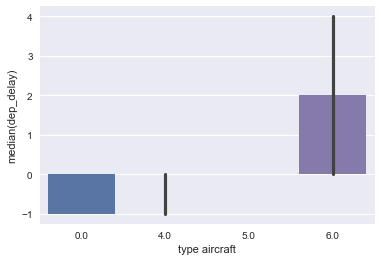

In [68]:
sns.barplot(x='type aircraft', y='dep_delay', data=df2, estimator=np.median)

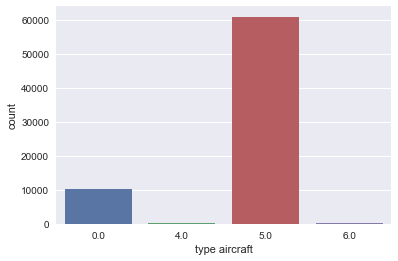

In [69]:
sns.countplot(x='type aircraft', data=df2)

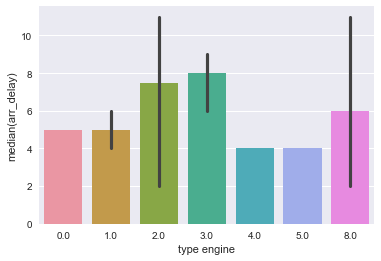

In [70]:
sns.barplot(x='type engine', y='arr_delay', data=df2, estimator=np.median)

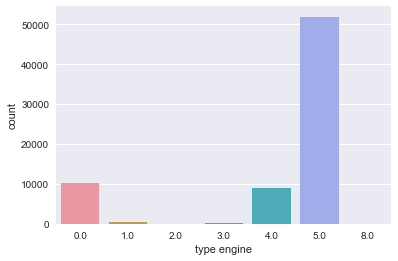

In [71]:
sns.countplot(x='type engine', data=df2)

Above we see graphs showing median delays for each type of aircraft and engine along with plots counting how many flights had each type.

We see that the Turbo-prop and Turbo-shaft engines and the Rotorcraft aircraft seem to be associated with higher delays. Still, we also find that the majority of commercial aircrafts flying from NYC are Fixed wing multi engine with Turbo-fan engines.

**Findings:**

Following the same trend as previous questions, the aircraft and engine seems to have a certain relationship to delays, but the flights with the types that are associated to delays are too few to justify an action. As mentioned above, Turbo-prop and Turbo-shaft engines and the Rotorcraft aircraft show higher delays, but the majority of commercial aircrafts flying from NYC are Fixed wing multi engine with Turbo-fan engines. 

This is usefule information, but it would seem that the return on investement can be maximized by looking at other features.

### Question 7: Does the weather affect the punctuality of the flights?

Until now, we have seen features that in different ways have certain relationships with the delays, but up until now none that has a big impact on the delays. This brings us back to the possible weather problems in Wyoming when studying the airports.

Iowa State University has been collecting data from airport weather observations around this world. This data can be used to try to understand if weather is better at explaining delays than the features analyzed until now.

The New York weather data can be found in the following link: https://mesonet.agron.iastate.edu/request/download.phtml?network=NY_ASOS

In [149]:
nyc_weather = pd.read_csv('nyc_weather.txt', delimiter=',')
nyc_weather.drop(['station'], axis=1, inplace=True)
nyc_weather.rename(columns={'valid':'time', ' tmpc ':'temp', '  relh ':'humid', '  mslp ':'pressure',
                            '  sped ':'wind speed', '  p01m ':'precipitation', '  vsby':'visibility'}, inplace=True)
nyc_weather['pressure'] = pd.to_numeric(nyc_weather['pressure'], errors='coerce')

In [151]:
nyc_weather['pressure'] = nyc_weather['pressure'].fillna(nyc_weather['pressure'].mean())

In [152]:
nyc_weather['time'] = pd.to_datetime(nyc_weather['time'])
nyc_weather['month'] = nyc_weather['time'].dt.month
nyc_weather['day'] = nyc_weather['time'].dt.day
nyc_weather['hour'] = nyc_weather['time'].dt.hour

In [153]:
nyc_weather.head()

,time,temp,humid,pressure,precipitation,visibility,month,day,hour
0,2013-01-01 01:51:00,3.3,61.94,1011.7,0.0,10.0,1,1,1
1,2013-01-01 02:51:00,3.9,61.63,1011.6,0.0,10.0,1,1,2
2,2013-01-01 03:51:00,3.9,61.63,1011.9,0.0,10.0,1,1,3
3,2013-01-01 04:51:00,3.9,61.63,1011.6,0.0,10.0,1,1,4
4,2013-01-01 05:51:00,3.9,59.37,1011.2,0.0,10.0,1,1,5


In [155]:
df3 = pd.merge(df2, nyc_weather, on=['month','day','hour'])

In [157]:
df3.drop('time', axis=1, inplace=True)

In [162]:
df5[['dep_delay', 'arr_delay', 'temp', 'humid', 'precipitation', 'visibility', 'pressure']].corr()

,dep_delay,arr_delay,temp,humid,precipitation,visibility,pressure
dep_delay,1.000000,0.920123,0.106535,0.124377,0.058400,-0.083979,-0.071006
arr_delay,0.920123,1.000000,0.098887,0.164175,0.094175,-0.148979,-0.081927
temp,0.106535,0.098887,1.000000,0.032339,0.047694,0.038669,-0.196978
humid,0.124377,0.164175,0.032339,1.000000,0.285191,-0.747392,-0.160495
precipitation,0.058400,0.094175,0.047694,0.285191,1.000000,-0.354839,-0.035552
visibility,-0.083979,-0.148979,0.038669,-0.747392,-0.354839,1.000000,0.039294
pressure,-0.071006,-0.081927,-0.196978,-0.160495,-0.035552,0.039294,1.000000


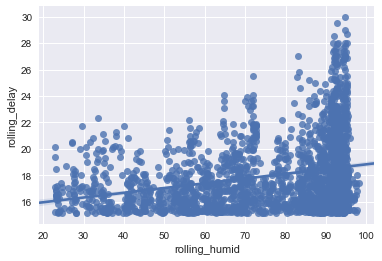

In [166]:
df3['rolling_humid'] = df3['humid'].rolling(10).mean()
df3['rolling_delay'] = df3['dep_delay'].rolling(10).mean()
sns.regplot(x='rolling_humid', y='rolling_delay', data=df3[df3['rolling_delay']>15])

Even though none of the weather features show a very strong correlation with delays, the correlation matrix shows humidity as the feature with the highest correlation. When we plot the relationship between departure delays and humidity with a rolling mean to smoothen the data we see an upward trend in delays as humidity rises.

There is an explanation for this according to Frank DiBonaventuro, an Air Force officer and Physics Grad:

"Humidity affects the way an airplane flies because of the change in pressure that accompanies changes in humidity. As the humidity goes up, the air pressure for a given volume of air goes down. This means the wings have fewer air molecules to affect as they are pushed through the airmass. Fewer molecules = less lift.
The other problem is that jet engines do not like humidity either. Jet engines are built for cold, dry air, and humid air has fewer oxygen molecules to burn per unit volume. Therefore the engine combusts a little bit less and puts out slightly less thrust. There are four factors that decrease the performance of a jet airplane - heavy, hot, high, and humid. Notice that three of those factors all have the net effect of lowering the density of the air.

So there you have it. Humidity decreases the performance of most aircraft, not only because of it's effect on the wings, but also the effect on the engines." (http://www.physlink.com/education/askexperts/ae652.cfm)

**Findings:**

Weather does also seem to be related to delays, especially humidity. As seen above, humidity affects the ability of the plane to lift and take off. This also supports the information we saw above with respect to delays during the year. It was curious that summer shows higher delays than winter when both seasons are intituitively popular for traveling. Summer corresponds to much higher temperatures and humidity levels than winter, which could have a stronger effect on the delays.